In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Assuming you've loaded your data into a DataFrame
# data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file
data = pd.read_csv('/home/alan-xie/Documents/Thesis/wifi_localization/data/csv/still/still.csv')

In [3]:
# data.drop('rssi', axis=1, inplace=True)
# data.drop('rssi1', axis=1, inplace=True)
# data.drop('rssi2', axis=1, inplace=True)
# data.drop('rssi3', axis=1, inplace=True)
# data.drop(columns=["timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers', 'csi_len', 'channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'payload_length', 'block_length', 'with_receiver'], axis=1, inplace=True)

# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)
# data.drop(columns=['coord1', 'coord2', "timestamps", 'ant1_amplitude', 'ant2_amplitude', 'subcarriers'], inplace=True)


In [4]:
data.drop(columns=['ant1_amplitude', 'ant2_amplitude', 'subcarriers','coord1', 'coord2'], inplace=True)

In [5]:
features_scaled = ["ant1_phase", "ant2_phase", "rssi", "rssi1", "rssi2"]
X = data.copy()
features = data.columns

# Separate the columns that need to be scaled
columns_to_scale = [col for col in X.columns if col not in features_scaled]

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the columns that need to be scaled
X_scaled_part = scaler.fit_transform(X[columns_to_scale])

# Create a DataFrame for the scaled part, with the correct column names
X_scaled_df = pd.DataFrame(X_scaled_part, columns=columns_to_scale)

# Combine the scaled columns with the unscaled columns
X_scaled = pd.concat([X_scaled_df, X[features_scaled]], axis=1)

# Reorder columns to match the original DataFrame's structure (optional)
X_scaled = X_scaled[X.columns]

X_scaled.head()

,timestamps,csi_len,channel,err_info,noise_floor,rate,bandWidth,num_tones,nr,nc,...,rssi1,rssi2,rssi3,payload_length,block_length,ant1_phase,ant2_phase,with_receiver,ant1_amplitude_cluster,ant2_amplitude_cluster
0,1.569458,-2.52072,0.002519,-0.009127,0.0,-2.762528,0.0,0.0,0.0,-2.52072,...,-0.138127,-0.766719,0.0,-1.279931,-2.494434,1.658672,0.052610,0.0,-1.111957,-1.063388
1,1.569458,-2.52072,0.002519,-0.009127,0.0,-2.762528,0.0,0.0,0.0,-2.52072,...,-0.138127,-0.766719,0.0,-1.279931,-2.494434,1.639651,0.039700,0.0,-0.953096,-1.092675
2,1.569458,-2.52072,0.002519,-0.009127,0.0,-2.762528,0.0,0.0,0.0,-2.52072,...,-0.138127,-0.766719,0.0,-1.279931,-2.494434,1.602653,0.036678,0.0,-0.476514,-0.858375
3,1.569458,-2.52072,0.002519,-0.009127,0.0,-2.762528,0.0,0.0,0.0,-2.52072,...,-0.138127,-0.766719,0.0,-1.279931,-2.494434,1.595896,0.025040,0.0,-0.317653,-0.741226
4,1.569458,-2.52072,0.002519,-0.009127,0.0,-2.762528,0.0,0.0,0.0,-2.52072,...,-0.138127,-0.766719,0.0,-1.279931,-2.494434,1.607421,0.011515,0.0,-0.337511,-0.770513


In [6]:
for i in range(1, X_scaled.shape[0]):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    # print(f'Explained variance by each component: {explained_variance}')
    print(f"PCA with {i} components, sum is {sum(explained_variance)}.")
    
    if (sum(explained_variance) >= 0.85):
        break

X_pca = pca.fit_transform(X_scaled)

PCA with 1 components, sum is 0.24244308605845166.
PCA with 2 components, sum is 0.35906258332275376.
PCA with 3 components, sum is 0.4699908438941297.
PCA with 4 components, sum is 0.5489799199535031.
PCA with 5 components, sum is 0.627699414131731.
PCA with 6 components, sum is 0.6995870281132851.
PCA with 7 components, sum is 0.7713957529427949.
PCA with 8 components, sum is 0.8395979487870989.
PCA with 9 components, sum is 0.9044284174120459.


In [7]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')


Explained variance by each component: [0.24244309 0.1166195  0.11092826 0.07898908 0.07871949 0.07188761
 0.07180872 0.0682022  0.06483047]


In [8]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [9]:
print(features)

Index(['timestamps', 'csi_len', 'channel', 'err_info', 'noise_floor', 'rate',
       'bandWidth', 'num_tones', 'nr', 'nc', 'rssi', 'rssi1', 'rssi2', 'rssi3',
       'payload_length', 'block_length', 'ant1_phase', 'ant2_phase',
       'with_receiver', 'ant1_amplitude_cluster', 'ant2_amplitude_cluster'],
      dtype='object')


In [10]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=features)

print(loading_df)


   timestamps   csi_len   channel  err_info   noise_floor      rate  \
0   -0.041754  0.517622 -0.001082 -0.016689 -1.734723e-18  0.483309   
1   -0.009728 -0.016977  0.002659  0.017579 -0.000000e+00 -0.096414   
2    0.054852 -0.200095 -0.005732  0.014152  5.551115e-17 -0.162584   
3    0.282804  0.040902  0.019337 -0.030655 -9.714451e-17  0.089138   
4   -0.490584 -0.069336 -0.011187  0.026369 -2.775558e-17 -0.152896   
5    0.021223 -0.001743  0.991169  0.126206 -1.216475e-16 -0.003481   
6    0.039118  0.013867 -0.126272  0.990421  1.687019e-16  0.018128   
7    0.805117 -0.005572 -0.031087 -0.024326  5.551115e-17 -0.070803   
8    0.021854 -0.004098  0.001109  0.001910  2.211772e-17 -0.005393   

      bandWidth     num_tones            nr        nc  ...     rssi1  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.517622  ... -0.042950   
1 -1.110223e-16 -0.000000e+00  6.938894e-18 -0.016977  ...  0.438799   
2  2.775558e-17 -1.387779e-17  3.469447e-18 -0.200095  ... -0.205858   
3

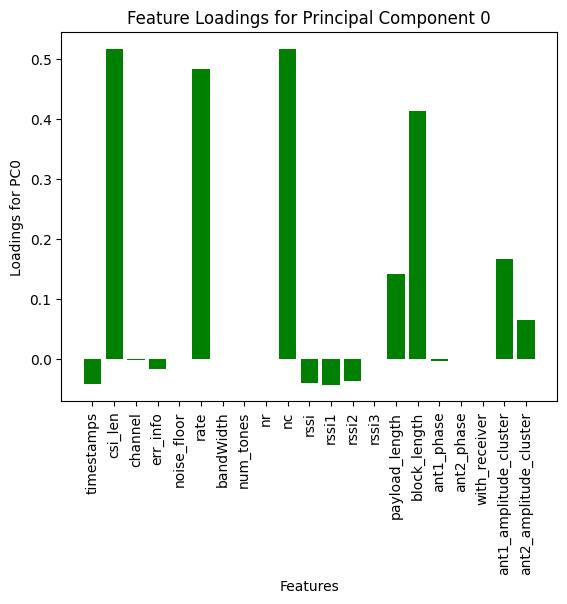

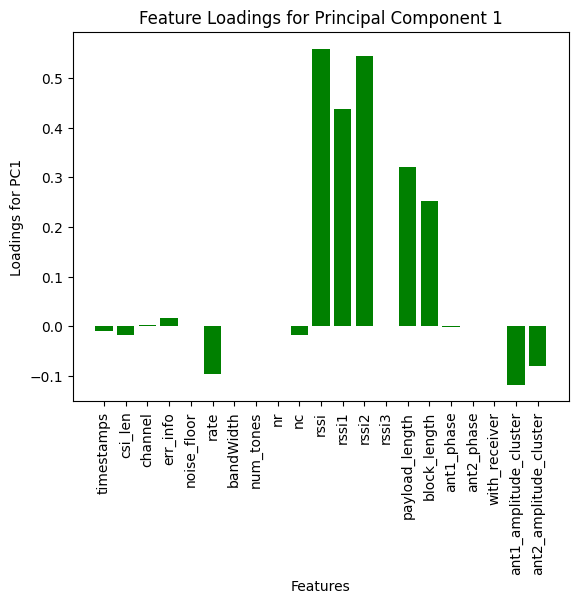

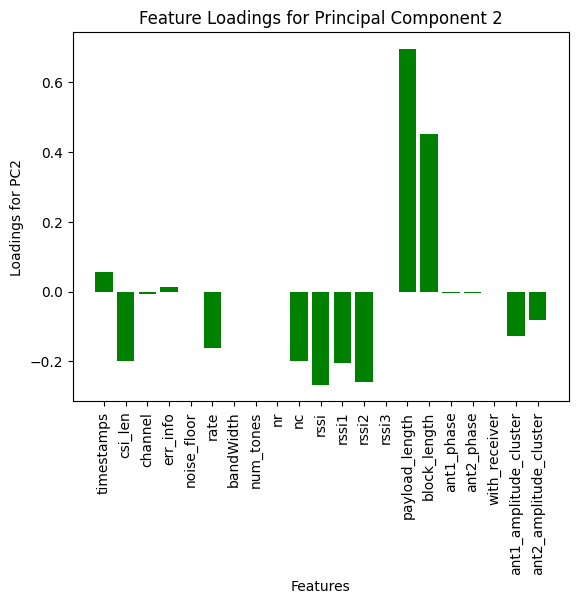

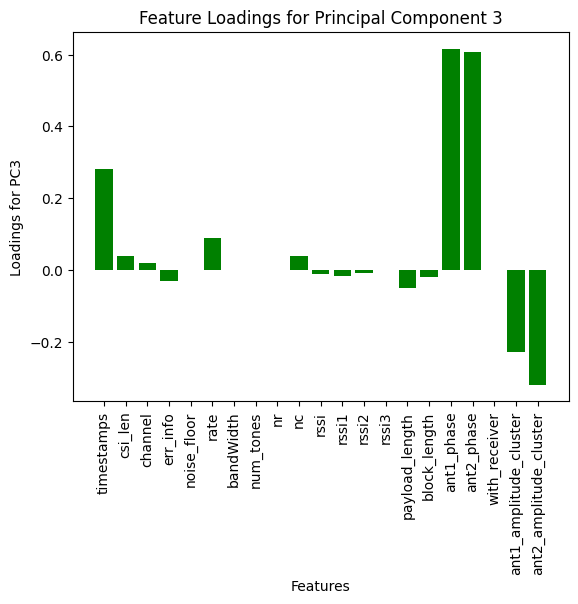

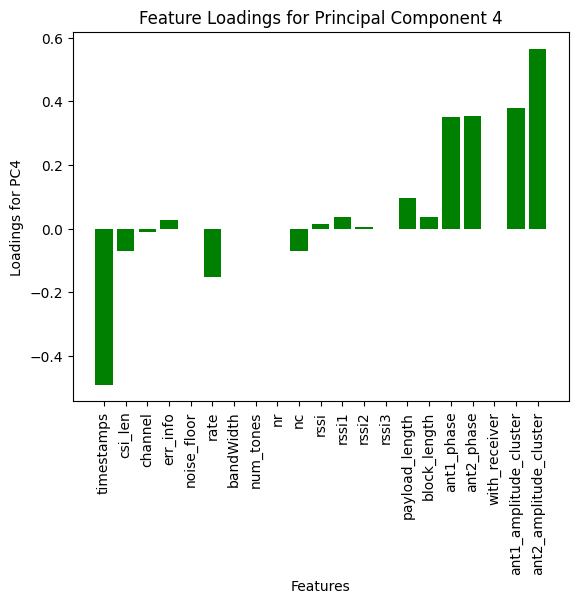

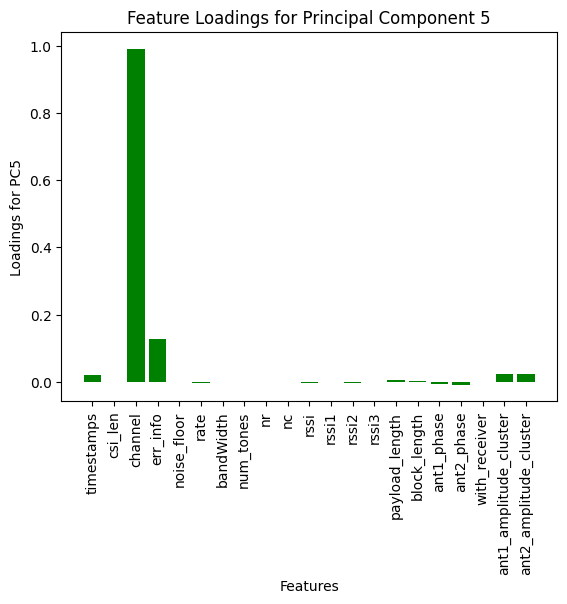

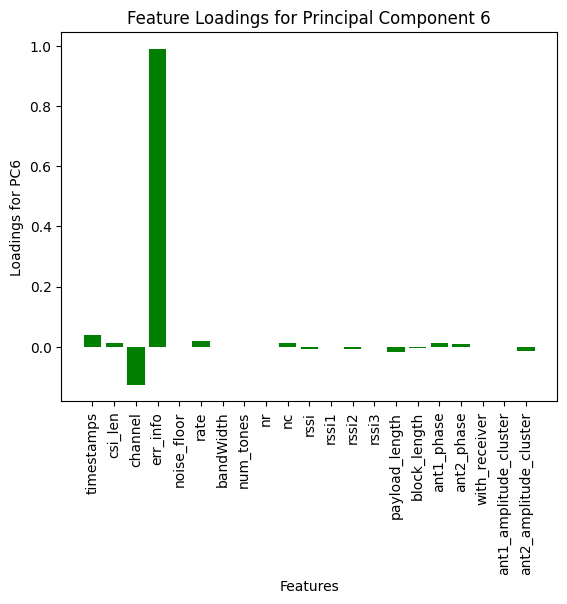

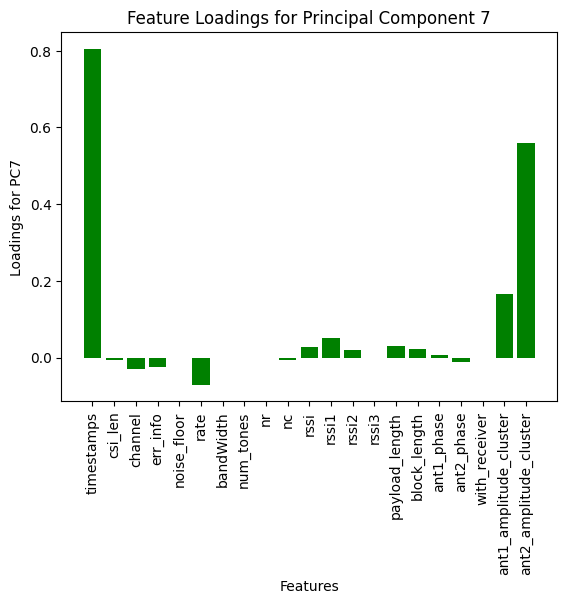

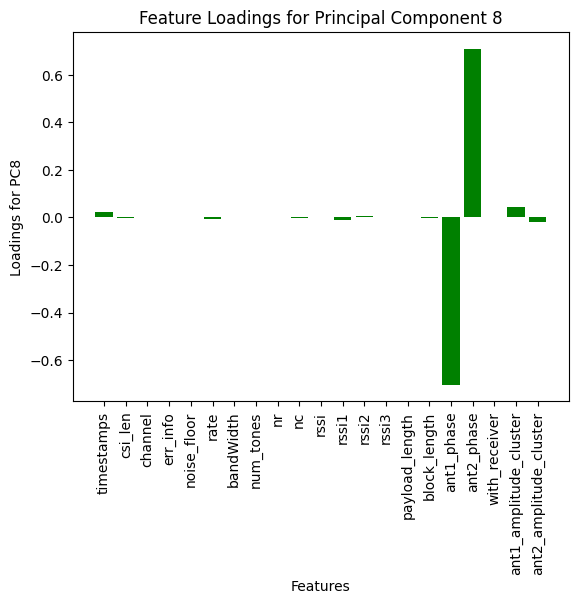

In [11]:
for j in range(i):
    plt.bar(features, loadings[j], color='g')
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel(f'Loadings for PC{j}')
    plt.title(f'Feature Loadings for Principal Component {j}')
    plt.show()


In [12]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.24244309 0.35906258 0.46999084 0.54897992 0.62769941 0.69958703
 0.77139575 0.83959795 0.90442842]


In [13]:
pca = PCA(n_components=i)
X_reduced = pca.fit_transform(X)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [1.00000000e+00 2.25961277e-14 6.07896522e-15 1.22077207e-15
 5.82940440e-16 1.13050031e-18 7.02785750e-19 5.65981446e-19
 4.64900880e-19]
SUM: 1.0000000000000002


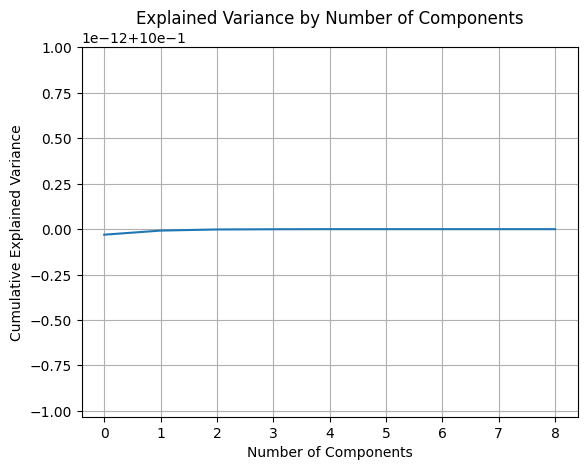

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [15]:
# Remove exact duplicates
# df = pd.DataFrame(X_reduced)
# X_reduced_deduped = df.drop_duplicates()
